# Using GraphiPy to extract data from Tumblr

In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# create GraphiPy object (default to Pandas)
graphipy = GraphiPy()

# Creating the Tumblr Object

GraphiPy's Tumblr object needs CONSUMER_KEY, CONSUMER_SECRET, OAUTH_TOKEN, and OAUTH_SECRET in order to connect to Tumblr's API:
- To get the keys and the tokens, go to https://api.tumblr.com/console

In [3]:
# The tumblr API needs these credentials
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_SECRET = ''
tumblr_api_credentials = {
    "consumer_key": CONSUMER_KEY,
    "consumer_secret": CONSUMER_SECRET,
    "oauth_token": OAUTH_TOKEN,
    "oauth_secret": OAUTH_SECRET
}

# create the tumblr object
tumblr = graphipy.get_tumblr(tumblr_api_credentials)

# Find Posts by a Tag

### def fetch_posts_tagged(self, graph, tag, limit=20, before=0, filter="")

Optional parameters:
- limit: the number of results to return: 1–20, inclusive
- before: retrieve posts before the specified timestamp

Types of nodes returned:
- blog
- post

Types of edge returned:
- PUBLISHED

In [4]:
keyword = "python"

# Every function call modifies the graph that is sent as input
# tagged_posts = graphipy.create_graph()
# tumblr.fetch_posts_tagged(graph=tagged_posts, tag=keyword, limit=3)

# However, it also returns the graph modified so you can assign it to other variables like so:
tagged_posts = tumblr.fetch_posts_tagged(graph=graphipy.create_graph(), tag=keyword, limit=5)

In [5]:
# To get the list of available nodes
# There're posts and blogs in this case
print(tagged_posts.get_nodes().keys())

dict_keys(['post', 'blog'])


In [6]:
# You can get the dataframe from Pandas by specifying the node
tagged_posts_df = tagged_posts.get_df("post")

In [7]:
tagged_posts_df

,Id,Label,label_attribute,type,blog_name,post_url,slug,date,timestamp,state,...,note_count,can_like,can_reblog,can_send_in_message,can_reply,display_avatar,caption,photos,trail,reblog
0,180165261089,180165261089,post,photo,djangodeveloper,https://djangodeveloper.tumblr.com/post/180165...,practical-python-regular-expressions-with-python,2018-11-16 07:40:22 GMT,1542354022,published,...,0,True,True,True,True,True,<p>Practical Python - Regular Expressions With...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'djangodeveloper', 'active'...",{'comment': '<p>Practical Python - Regular Exp...
1,180165127266,180165127266,post,photo,pythonprogrammingthings,https://pythonprogrammingthings.tumblr.com/pos...,python-web-development-httpbitly2pxgkip,2018-11-16 07:33:10 GMT,1542353590,published,...,0,True,True,True,True,True,"<p>Python Web Development<br/>\n☞ <a href=""htt...","[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'pythonprogrammingthings', ...",{'comment': '<p>Python Web Development<br> ☞ <...
2,180164743852,180164743852,post,photo,awesomecodetutorials,https://awesomecodetutorials.tumblr.com/post/1...,django-for-beginners-the-ultimate-course-for-web,2018-11-16 07:13:08 GMT,1542352388,published,...,1,True,True,True,True,True,<p>Django for Beginners: The Ultimate Course f...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'awesomecodetutorials', 'ac...",{'comment': '<p>Django for Beginners: The Ulti...
3,180163457804,180163457804,post,photo,pythonprogrammingthings,https://pythonprogrammingthings.tumblr.com/pos...,complete-python-web-course-build-8-python-web,2018-11-16 06:11:22 GMT,1542348682,published,...,0,True,True,True,True,True,<p>Complete Python Web Course: Build 8 Python ...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'pythonprogrammingthings', ...",{'comment': '<p>Complete Python Web Course: Bu...
4,180161391356,180161391356,post,photo,pythonprogrammingthings,https://pythonprogrammingthings.tumblr.com/pos...,complete-python-bootcamp-go-from-zero-to-hero-in,2018-11-16 04:49:46 GMT,1542343786,published,...,1,True,True,True,True,True,<p>Complete Python Bootcamp: Go from zero to h...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'pythonprogrammingthings', ...",{'comment': '<p>Complete Python Bootcamp: Go f...


In [8]:
# show the attributes of this node
tagged_posts_df.iloc[0]

Id                                                            180165261089
Label                                                         180165261089
label_attribute                                                       post
type                                                                 photo
blog_name                                                  djangodeveloper
post_url                 https://djangodeveloper.tumblr.com/post/180165...
slug                      practical-python-regular-expressions-with-python
date                                               2018-11-16 07:40:22 GMT
timestamp                                                       1542354022
state                                                            published
format                                                                html
reblog_key                                                        Jt5GNxTp
tags                     [python, python tutorial, python development, ...
short_url                

In [9]:
# The same works with edges
pb_edges = tagged_posts.get_edges()
print(pb_edges.keys())

dict_keys(['published'])


In [10]:
pb_edges["published"]

,Source,Target,Label,label_attribute,Id
0,djangodeveloper,180165261089,PUBLISHED,PUBLISHED,djangodeveloper180165261089PUBLISHED
1,pythonprogrammingthings,180165127266,PUBLISHED,PUBLISHED,pythonprogrammingthings180165127266PUBLISHED
2,awesomecodetutorials,180164743852,PUBLISHED,PUBLISHED,awesomecodetutorials180164743852PUBLISHED
3,pythonprogrammingthings,180163457804,PUBLISHED,PUBLISHED,pythonprogrammingthings180163457804PUBLISHED
4,pythonprogrammingthings,180161391356,PUBLISHED,PUBLISHED,pythonprogrammingthings180161391356PUBLISHED


# Find a Blog by Blog Name

### def fetch_blog(self, graph, blog_name)

Type of node returned:
- blog

No edges returned

In [11]:
# Let's try searching for a blog
blog_to_search = tagged_posts_df.blog_name[0]

In [12]:
# Call the appropriate function
blog = tumblr.fetch_blog(graphipy.create_graph(), blog_name=blog_to_search)

In [13]:
# You can get the dataframe from Pandas by specifying the node (only 1 node in this case)
blog_df = blog.get_df("blog")

In [14]:
blog_df

,Id,Label,label_attribute,name,title,description,url,uuid,updated
0,djangodeveloper,Django Developer,blog,djangodeveloper,Django Developer,,https://djangodeveloper.tumblr.com/,t:XDGA3TQVWSzgj3_XS7CRtA,1542354022


# Find Blogs followed by a Given Blog

### def fetch_blogs_following(self, graph, blog_name, limit=20, offset=0)

Optional parameters:
- limit: the number of results to return: 1–20, inclusive	
- offset: followed blog index to start at	

Type of node returned:
- blog

Type of edge returned:
- FOLLOWING

In [15]:
# Let's use the blog name we used in the last section
blogs_following = tumblr.fetch_blogs_following(graphipy.create_graph(), blog_name=blog_to_search, limit=5)

# Grab the nodes
blogs_nodes = blogs_following.get_nodes()
print(blogs_nodes.keys())

dict_keys(['blog'])


In [16]:
# View the nodes
blogs_nodes["blog"]

,Id,Label,label_attribute,name,title,description,url,uuid,updated
0,djangodeveloper,Django Developer,blog,djangodeveloper,Django Developer,,https://djangodeveloper.tumblr.com/,t:XDGA3TQVWSzgj3_XS7CRtA,1542354022
1,do-you-even-code-bro,hello world,blog,do-you-even-code-bro,hello world,"<p>If your dream isn't worth the risk, what is...",https://do-you-even-code-bro.tumblr.com/,t:K39lqnkuWfRoUbTdpnk1CQ,1541708467
2,ffreakyflamingo,My Snaughter Venus,blog,ffreakyflamingo,My Snaughter Venus,"<p>Not about Flamingos, just my normal ball py...",https://ffreakyflamingo.tumblr.com/,t:TQ29oPL7hVsv-qizpLNIwg,1540686931
3,anangstyblackgirl,always annoyed,blog,anangstyblackgirl,always annoyed,AN ANGSTY BLACK GIRL IS 27. chicagoan. writer/...,https://anangstyblackgirl.tumblr.com/,t:EAvDkt3T97Z8m-VAQKTyGw,1531627938
4,staff,Tumblr Staff,blog,staff,Tumblr Staff,please clap,https://staff.tumblr.com/,t:0aY0xL2Fi1OFJg4YxpmegQ,1542061588


In [17]:
# Grab the edges
bb_edges = blogs_following.get_edges()
print(bb_edges.keys())

dict_keys(['following'])


In [18]:
# View the edges
bb_edges["following"]

,Source,Target,Label,label_attribute,Id
0,djangodeveloper,do-you-even-code-bro,FOLLOWING,FOLLOWING,djangodeveloperdo-you-even-code-broFOLLOWING
1,djangodeveloper,ffreakyflamingo,FOLLOWING,FOLLOWING,djangodeveloperffreakyflamingoFOLLOWING
2,djangodeveloper,anangstyblackgirl,FOLLOWING,FOLLOWING,djangodeveloperanangstyblackgirlFOLLOWING
3,djangodeveloper,staff,FOLLOWING,FOLLOWING,djangodeveloperstaffFOLLOWING


# Find Posts Published by a Given Blog

### def fetch_published_posts(self, graph, blog_name, type=None, tag="", limit=20, offset=0)

Optional parameters:
- type: the type of post to return. Specify one of the following: text, quote, link, answer, video, audio, photo, chat
- tag: limits the response to posts with the specified tag	
- limit: the number of posts to return: 1–20, inclusive	
- offset: post number to start at

Types of node returned:
- blog
- post

Type of edge returned:
- PUBLISHED

In [19]:
# We can also see all the posts published by some blog we researched in previous sections
published_posts = tumblr.fetch_published_posts(graphipy.create_graph(), blog_name=blog_to_search, limit=5, type="photo")

In [20]:
# Grab the nodes
nodes = published_posts.get_nodes()
print(nodes.keys())

dict_keys(['blog', 'post'])


In [21]:
# View the posts
nodes["post"]

,Id,Label,label_attribute,type,blog_name,post_url,slug,date,timestamp,state,...,note_count,can_like,can_reblog,can_send_in_message,can_reply,display_avatar,caption,photos,trail,reblog
0,180165261089,180165261089,post,photo,djangodeveloper,https://djangodeveloper.tumblr.com/post/180165...,practical-python-regular-expressions-with-python,2018-11-16 07:40:22 GMT,1542354022,published,...,0,True,True,True,True,True,<p>Practical Python - Regular Expressions With...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'djangodeveloper', 'active'...",{'comment': '<p>Practical Python - Regular Exp...
1,180157407715,180157407715,post,photo,djangodeveloper,https://djangodeveloper.tumblr.com/post/180157...,learn-python-python-for-beginners,2018-11-16 02:20:45 GMT,1542334845,published,...,0,True,True,True,True,True,<p>Learn Python: Python for Beginners<br/>\n☞ ...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'djangodeveloper', 'active'...",{'comment': '<p>Learn Python: Python for Begin...
2,180153189900,180153189900,post,photo,djangodeveloper,https://djangodeveloper.tumblr.com/post/180153...,bayesian-machine-learning-in-python-ab-testing,2018-11-15 23:40:48 GMT,1542325248,published,...,0,True,True,True,True,True,<p>Bayesian Machine Learning in Python: A/B Te...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'djangodeveloper', 'active'...",{'comment': '<p>Bayesian Machine Learning in P...
3,180148592874,180148592874,post,photo,djangodeveloper,https://djangodeveloper.tumblr.com/post/180148...,easy-natural-language-processing-nlp-in-python,2018-11-15 21:02:05 GMT,1542315725,published,...,1,True,True,True,True,True,<p>Easy Natural Language Processing (NLP) in P...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'djangodeveloper', 'active'...",{'comment': '<p>Easy Natural Language Processi...
4,180144231682,180144231682,post,photo,djangodeveloper,https://djangodeveloper.tumblr.com/post/180144...,learn-pandas-python-3-and-become-a-data-ninja,2018-11-15 18:20:42 GMT,1542306042,published,...,0,True,True,True,True,True,<p>Learn Pandas (Python 3) And Become A Data N...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'djangodeveloper', 'active'...",{'comment': '<p>Learn Pandas (Python 3) And Be...


# Find Posts Liked by a Given Blog

### def fetch_liked_posts(self,graph,blog_name,limit=20,offset=0,before=0,after=0)

Optimal parameters:
- limit: the number of results to return: 1–20, inclusive	
- offset: liked post number to start at
- before: retrieve posts liked before the specified timestamp	
- after: retrieve posts liked after the specified timestamp	

Types of nodes returned:
- blog
- post

Type of edge returned:
- LIKED

In [22]:
# We can also see all the posts published by the blog we researched in previous sections
liked_posts = tumblr.fetch_liked_posts(graphipy.create_graph(), blog_name=blog_to_search)

# Grab the nodes
nodes = liked_posts.get_nodes()
print(nodes.keys())

dict_keys(['blog', 'post'])


In [23]:
# View the posts
nodes["post"]

,Id,Label,label_attribute,type,blog_name,post_url,slug,date,timestamp,state,...,caption,permalink_url,html5_capable,thumbnail_url,thumbnail_width,thumbnail_height,video_type,player,trail,reblog
0,172693592981,172693592981,post,video,aestheticallypleasingcode,https://aestheticallypleasingcode.tumblr.com/p...,finally-got-around-to-creating-this-the-first-of,2018-04-07 17:02:57 GMT,1523120577,published,...,<p>Finally got around to creating this. The fi...,https://www.youtube.com/watch?v=UvuJx7rVUxg,True,https://i.ytimg.com/vi/UvuJx7rVUxg/hqdefault.jpg,480,360,youtube,"[{'width': 250, 'embed_code': '<iframe width=""...",[{'blog': {'name': 'aestheticallypleasingcode'...,{'comment': '<p>Finally got around to creating...
1,172870506651,172870506651,post,video,aestheticallypleasingcode,https://aestheticallypleasingcode.tumblr.com/p...,second-episode-is-ready-played-around-with-some,2018-04-12 20:46:46 GMT,1523566006,published,...,<p>Second episode is ready. </p><p>Played arou...,https://www.youtube.com/watch?v=Gj9CSJu1qjY,True,https://i.ytimg.com/vi/Gj9CSJu1qjY/hqdefault.jpg,480,360,youtube,"[{'width': 250, 'embed_code': '<iframe width=""...",[{'blog': {'name': 'aestheticallypleasingcode'...,{'comment': '<p>Second episode is ready. </p><...


# Exporting Graph as CSV Files

#### For more information, see DataExportDemo.ipynb

In [24]:
# You can then export the graph into .csv files
# Just call .export_CSV_all() on the graph desired
csv_name = "tumblr"
export_path_all = liked_posts.export_all_csv(csv_name)

# You can also specify the dataframes "you want to export by using the .export_CSV() function
# Provide the label_attributes of the nodes and edges you want to export
csv_name = "specific"
nodes = {"post"}
edges = {"LIKED"}
export_path_specific = liked_posts.export_csv(csv_name, nodes, edges)

# Visualization with NetworkX

#### For more information, see DataExportDemo.ipynb

In [25]:
# We will visualize liked_posts graph
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

In [26]:
# Create the networkx exporter object
exporter = graphipy.get_nx_exporter()
nx_graph = exporter.create_from_pd(liked_posts)

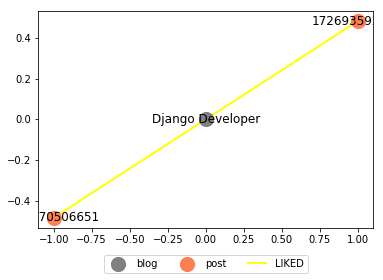

In [27]:
# Draw the graph using graphipy
color_set = set(mcolors.CSS4_COLORS)
options = {
    "node_label": "Label",
    "colorful_edges": True,
    "color_set": color_set
}
legend = exporter.draw_random(nx_graph, options=options, legend=plt)